# Predictor de cancer de pulmon
Proyecto Adamaris y Cristobal \\
Lung Cancer Prediction \\
data: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/

#Preparación de la base de datos

Librerias

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from traitlets.traitlets import default
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Visualización de los primeros datos

In [ ]:
df = pd.read_csv('lungcancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Reemplazamos los valores de la base de datos para tener todo en terminos de 0 y 1

In [ ]:
df = df.replace(1,0)
df = df.replace(2,1)

df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('YES', 1)
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO', 0)

df['GENDER'] = df['GENDER'].replace('M', 1)
df['GENDER'] = df['GENDER'].replace('F', 0)

In [ ]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,0,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


Estadisticas descriptivas para analisis inicial

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Eliminamos los valores duplicados

In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

Estandarizamos la base de datos


In [ ]:
df = df/df.max()
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.793103,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.850575,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.678161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.724138,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.724138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


Seleccionamos ejemplos aleatorios para evitar overfitting

In [ ]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [ ]:
X_over,y_over=RandomOverSampler().fit_resample(X,y)

Dividimos nuestros datos en un conjunto de prueba y otro de entrenamiento

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


Mapa de correlación

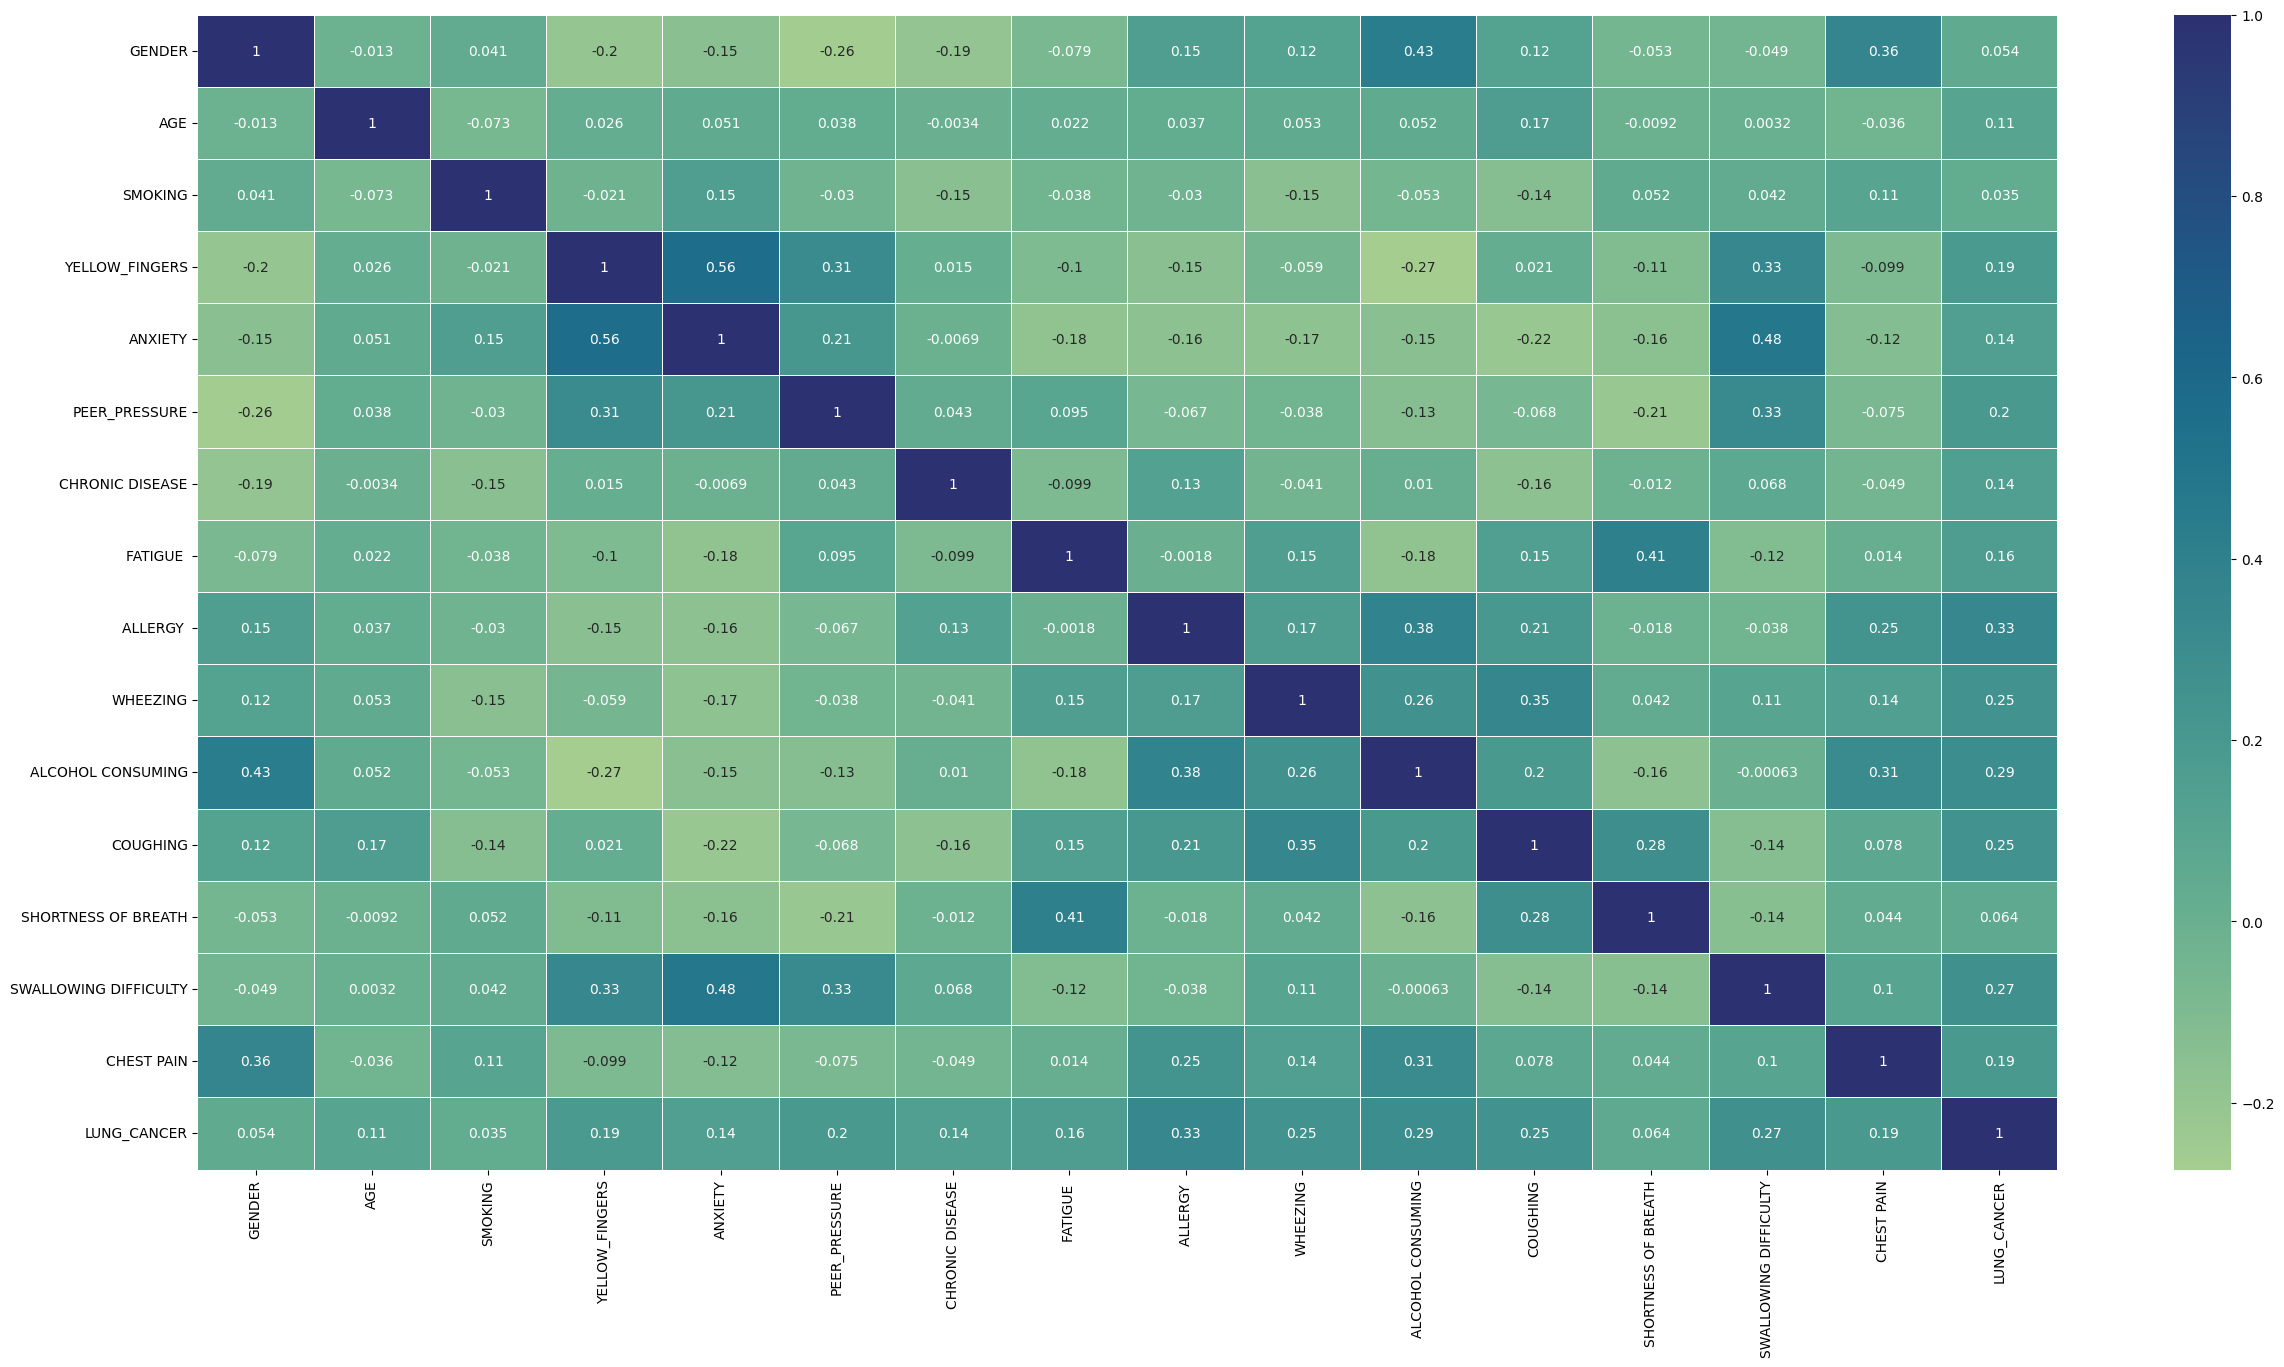

In [ ]:
fig = plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap="crest",annot=True, linewidth=0.5)
plt.show()

#Modelos

KNN

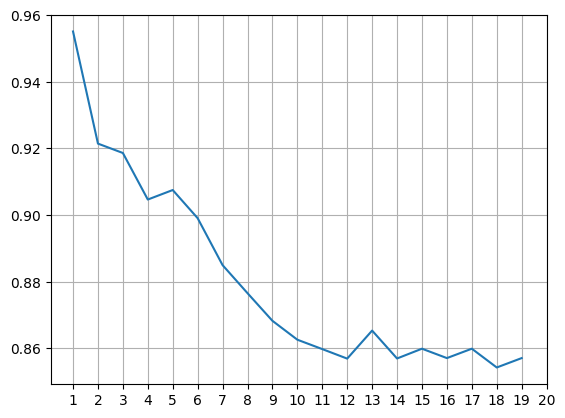

In [ ]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        60
         1.0       0.95      0.88      0.91        59

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



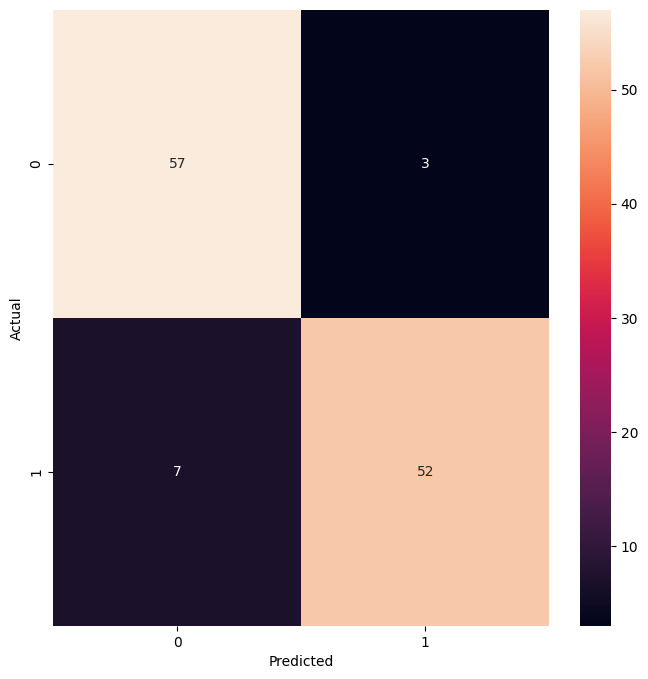

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

SVM

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        60
         1.0       0.95      0.95      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 10}



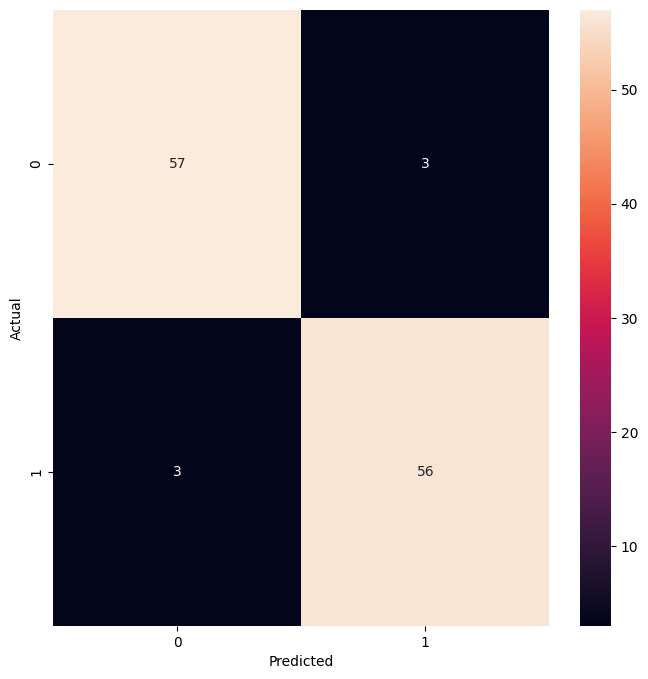

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

Random forest

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        60
         1.0       0.95      0.90      0.92        59

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119


Best Parameter: {'n_estimators': 150}



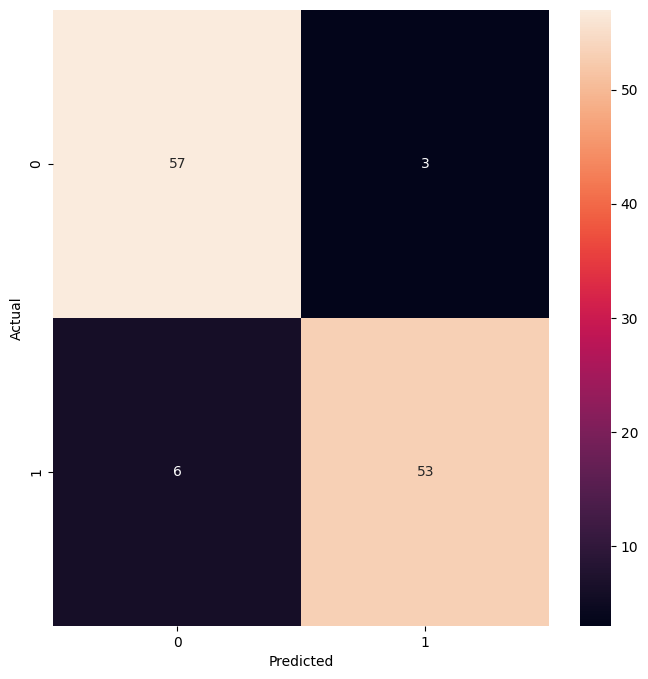

In [ ]:
param_grid = {'n_estimators': [50, 75,100, 150, 200,300],}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

#DecisionTreeClassifier

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.793103,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.850575,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.678161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.724138,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.724138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_cols = ['Gender', 'AGE', 'SMOKING', 'YELLOW_FINGERS','ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9159663865546218


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        60
         1.0       1.00      0.83      0.91        59

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119



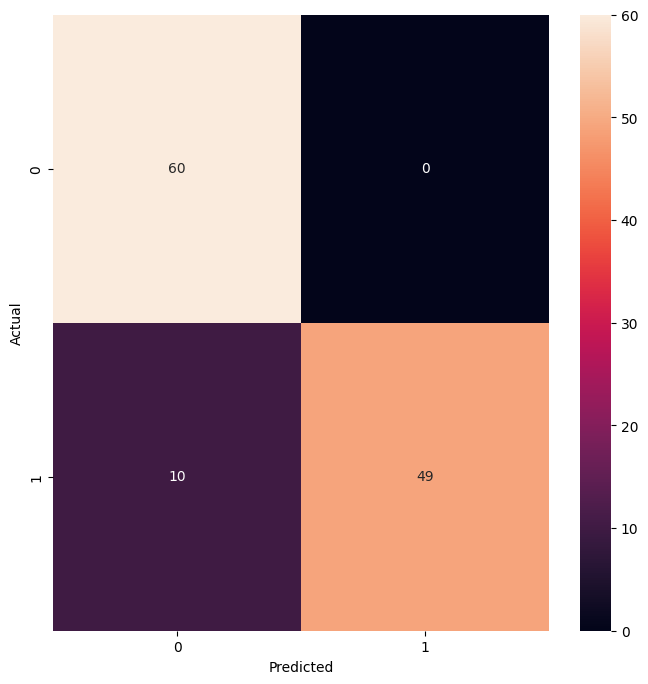

In [ ]:
confusion_svc=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

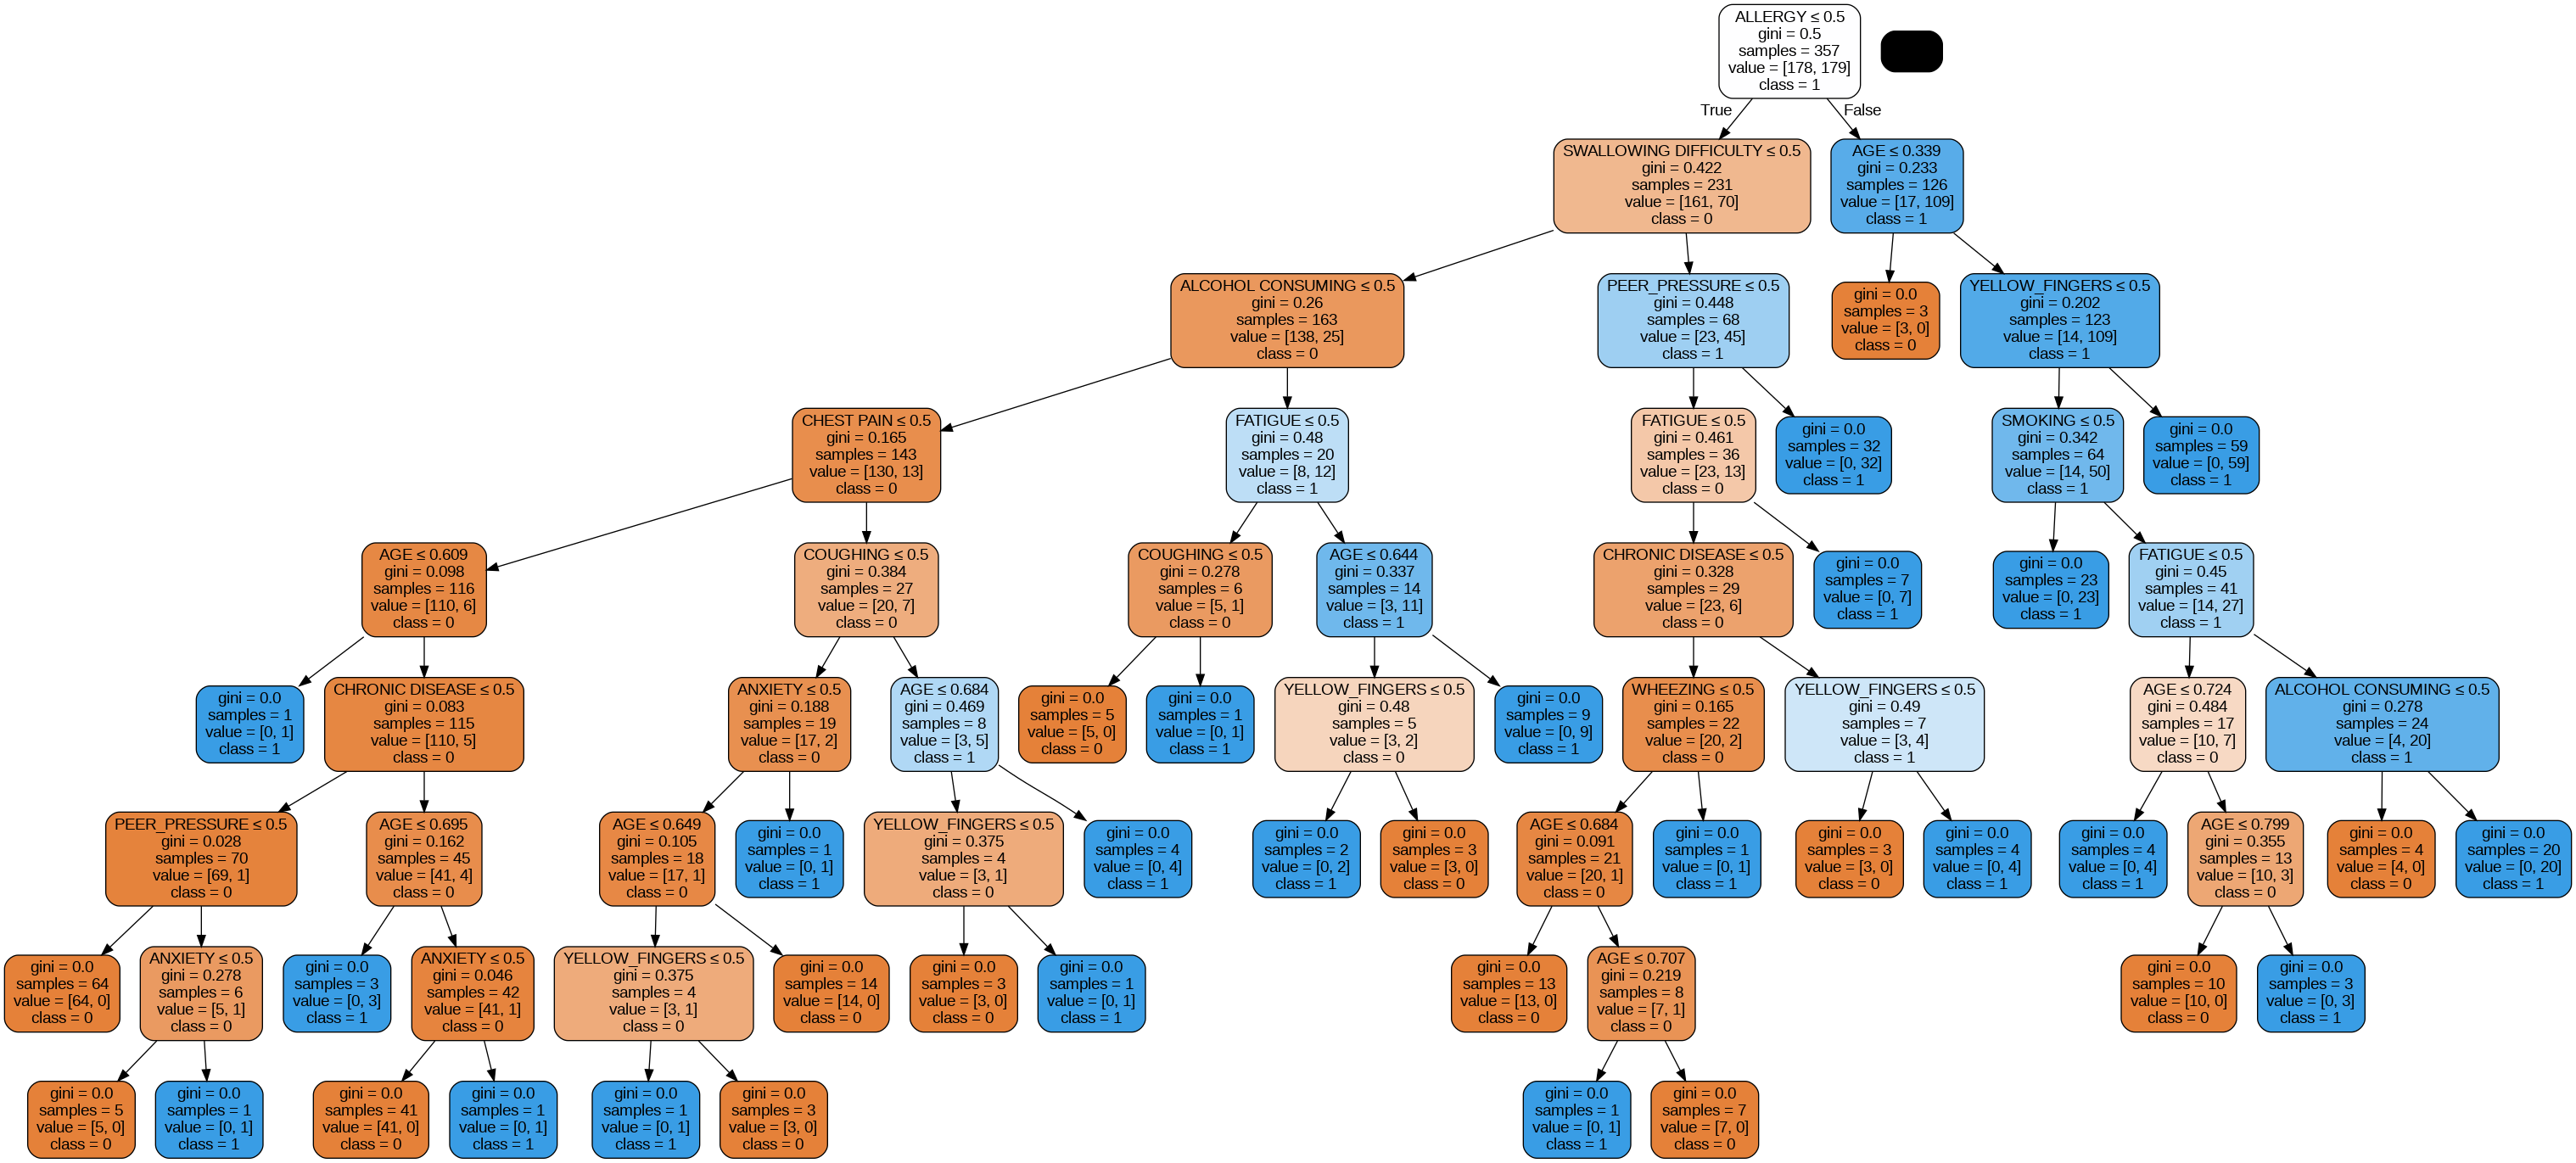

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('LungC.png')
Image(graph.create_png())

SVC (C-Support Vector Classification)

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        60
         1.0       0.95      0.93      0.94        59

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



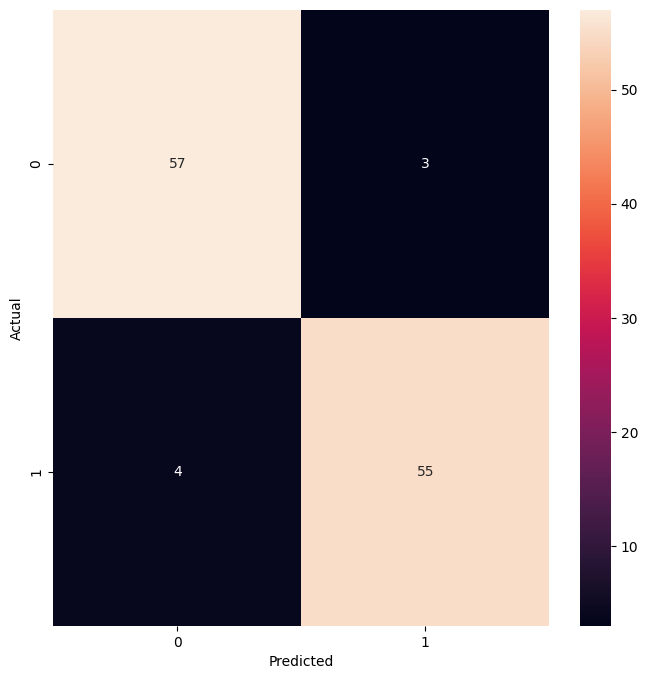

In [ ]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

MLP Classifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=500, alpha=1e-4, solver='sgd', verbose=10,random_state=54,learning_rate='adaptive',).fit(X_train,y_train)
print(model.score(X_train,y_train))

Iteration 1, loss = 0.74915513
Iteration 2, loss = 0.74831062
Iteration 3, loss = 0.74705196
Iteration 4, loss = 0.74544415
Iteration 5, loss = 0.74370851
Iteration 6, loss = 0.74160003
Iteration 7, loss = 0.73948921
Iteration 8, loss = 0.73730845
Iteration 9, loss = 0.73493320
Iteration 10, loss = 0.73264768
Iteration 11, loss = 0.73044799
Iteration 12, loss = 0.72812713
Iteration 13, loss = 0.72588320
Iteration 14, loss = 0.72380993
Iteration 15, loss = 0.72168079
Iteration 16, loss = 0.71933366
Iteration 17, loss = 0.71730191
Iteration 18, loss = 0.71525259
Iteration 19, loss = 0.71335682
Iteration 20, loss = 0.71143386
Iteration 21, loss = 0.70960047
Iteration 22, loss = 0.70772446
Iteration 23, loss = 0.70585324
Iteration 24, loss = 0.70414778
Iteration 25, loss = 0.70250356
Iteration 26, loss = 0.70080622
Iteration 27, loss = 0.69920161
Iteration 28, loss = 0.69753346
Iteration 29, loss = 0.69604653
Iteration 30, loss = 0.69447650
Iteration 31, loss = 0.69296261
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#PCA
Estimador de aprendizaje no supervisado.
 PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.793103,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.850575,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.678161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.724138,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.724138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
pca.components_

array([[-0.32739281, -0.00245682,  0.05858096,  0.37833218,  0.41581965,
         0.29483614,  0.0700875 , -0.08693646, -0.27208726, -0.23483764,
        -0.34649917, -0.26827325, -0.13755217,  0.26976512, -0.24704288]])

In [ ]:
print(pca.explained_variance_)

[0.68416005]


In [ ]:
pca.explained_variance_ratio_

array([0.19816341])

In [ ]:
pca_df = df[['GENDER','YELLOW_FINGERS','ANXIETY','ALCOHOL CONSUMING','PEER_PRESSURE','LUNG_CANCER']].copy()
pca_df.head()

,GENDER,YELLOW_FINGERS,ANXIETY,ALCOHOL CONSUMING,PEER_PRESSURE,LUNG_CANCER
0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X=pca_df.drop(['LUNG_CANCER'],axis=1)
y=pca_df['LUNG_CANCER']

In [ ]:
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 6)
Test shape: (119, 6)


DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_cols = ['GENDER','YELLOW_FINGERS','ANXIETY','ALCOHOL CONSUMING','PEER_PRESSURE', 'SMOKING']

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8403361344537815


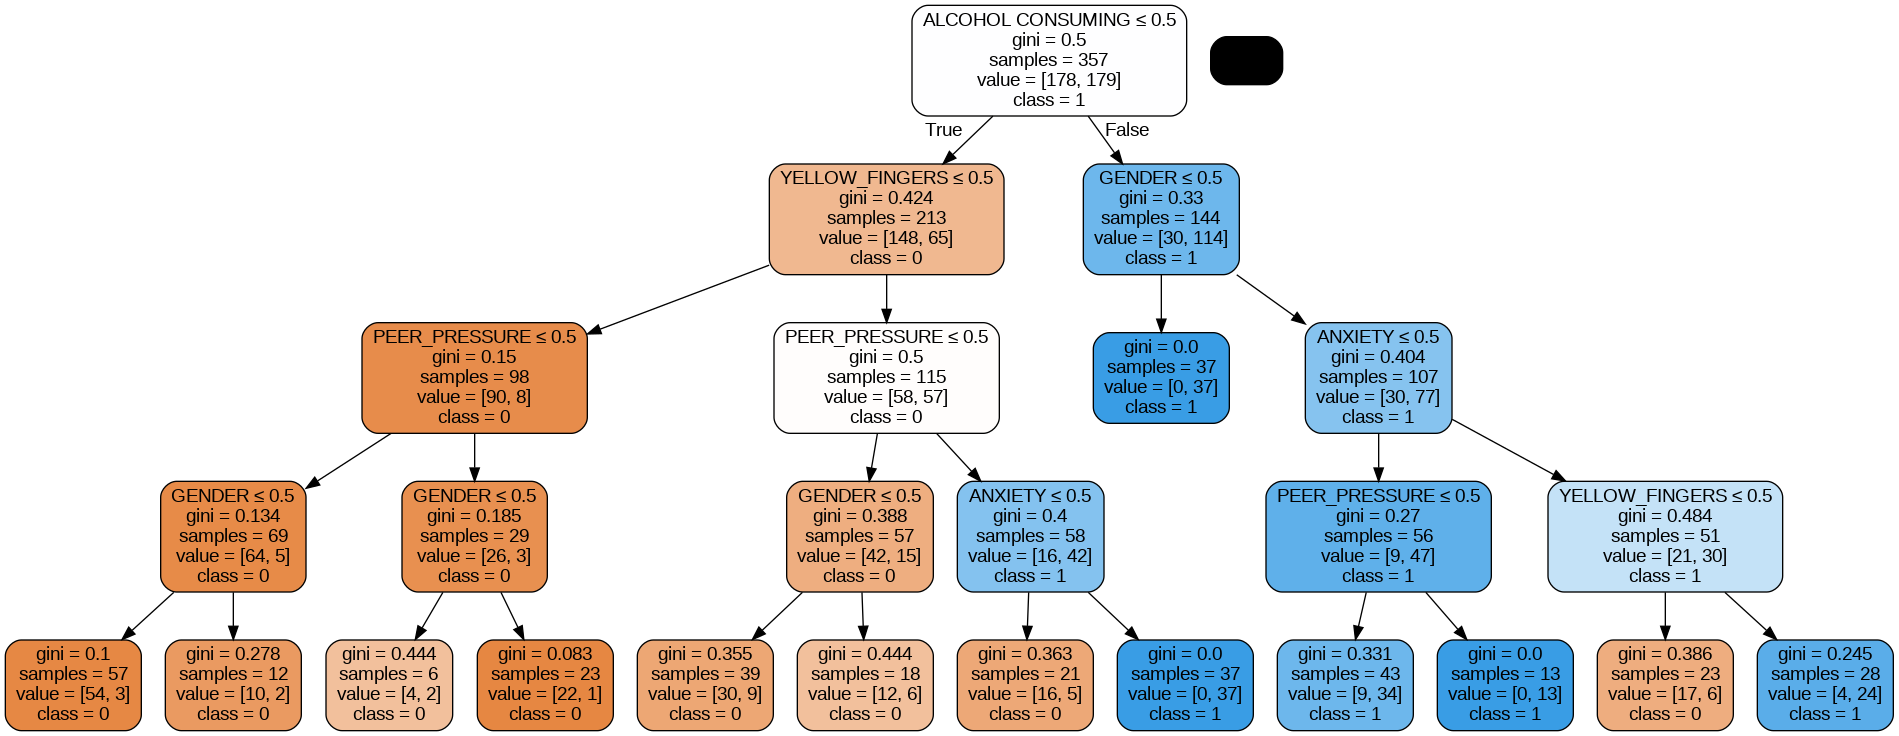

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('LungC.png')
Image(graph.create_png())

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        60
         1.0       0.88      0.78      0.83        59

    accuracy                           0.84       119
   macro avg       0.85      0.84      0.84       119
weighted avg       0.84      0.84      0.84       119



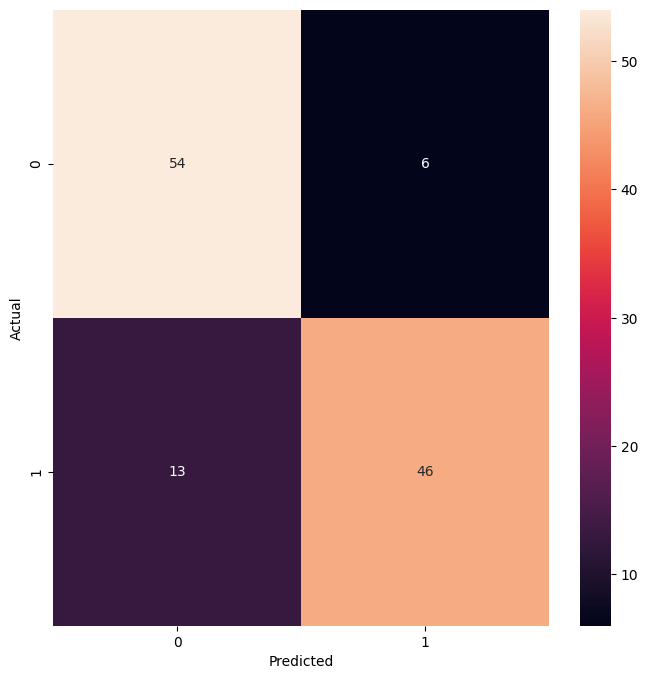

In [ ]:
confusion_svc=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))